In [20]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
#from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [22]:
dir = "escrita/Train/"
train_data = []
img_size = 32
non_chars = ["#", "$", "&", "@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count += 1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img, (img_size, img_size))
        train_data.append([img,i])

In [23]:
len(train_data)

140000

In [25]:
val_dir = "escrita/Validation/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir, i)
    for j in os.listdir(sub_directory):
        count += 1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img, (img_size, img_size))
        val_data.append([img,i])

In [26]:
len(val_data)

15209

In [27]:
random.shuffle(train_data)
random.shuffle(val_data)

In [28]:
len(val_data)

15209

In [29]:
train_X = []
train_Y = []
for features, label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [30]:
val_X = []
val_Y = []
for features, label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [31]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [32]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [33]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [34]:
print(train_X.shape,val_X.shape)

(140000, 32, 32, 1) (15209, 32, 32, 1)


In [35]:
print(train_Y.shape,val_Y.shape)

(140000, 35) (15209, 35)


In [19]:
val_Y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [36]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding="same", activation="relu", input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [38]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [39]:
history = model.fit(train_X, train_Y, epochs=50, batch_size=32, validation_data=(val_X, val_Y), verbose=1)

Epoch 1/50


4375/4375 [==============================] - 111s 25ms/step - loss: 0.5462 - accuracy: 0.8232 - val_loss: 0.6979 - val_accuracy: 0.8479
Epoch 2/50
4375/4375 [==============================] - 116s 27ms/step - loss: 0.3002 - accuracy: 0.8931 - val_loss: 0.6692 - val_accuracy: 0.8610
Epoch 3/50
4375/4375 [==============================] - 115s 26ms/step - loss: 0.2587 - accuracy: 0.9065 - val_loss: 0.6261 - val_accuracy: 0.8688
Epoch 4/50
4375/4375 [==============================] - 107s 24ms/step - loss: 0.2382 - accuracy: 0.9121 - val_loss: 0.6353 - val_accuracy: 0.8813
Epoch 5/50
4375/4375 [==============================] - 107s 24ms/step - loss: 0.2227 - accuracy: 0.9179 - val_loss: 0.6979 - val_accuracy: 0.8651
Epoch 6/50
4375/4375 [==============================] - 107s 24ms/step - loss: 0.2119 - accuracy: 0.9209 - val_loss: 0.6404 - val_accuracy: 0.8746
Epoch 7/50
4375/4375 [==============================] - 116s 27ms/step - loss: 0.2044 - accuracy: 0.9229 - val_loss:

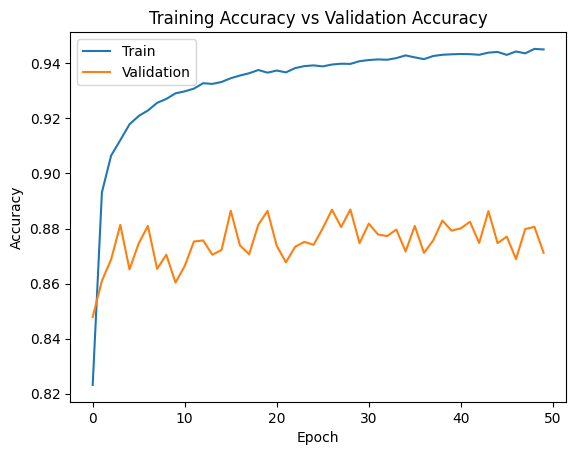

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

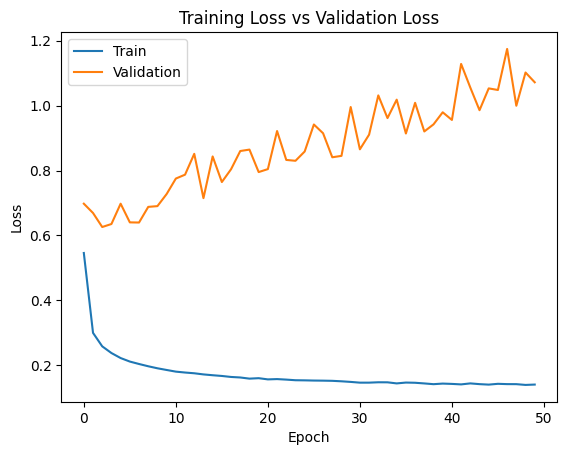

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [49]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == 'right-to-left' or method == 'bottom-to-top':
        reverse = True
    if method == 'top-to-bottom' or method == 'bottom-to-top':
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes), key=lambda b:b[1][i], reverse=reverse))
    return (cnts, boundingBoxes)

In [197]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)
    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]

    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x,y,w,h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)
        roi = gray[y:y+h, x:x+w]
        thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32,32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32")/255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, dilated

In [198]:
def get_word(letter):
    word = "".join(letter)
    return word

1/1 [==============================] - 0s 64ms/step
MBWFS


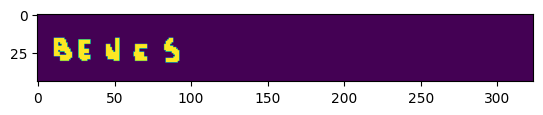

In [212]:
letters,image = get_letters("handwriting/train_v2/train/TRAIN_00003.jpg")
word = get_word(letters)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 57ms/step


TypeError: can only concatenate str (not "int") to str

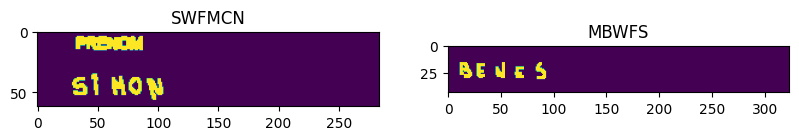

In [211]:
w = 100
h = 100
fig = plt.figure(figsize=(15, 15))
columns = 3
rows = 6
i = 1
words = [2,3,4,10]
for i in words:
    file = "handwriting/train_v2/train/TRAIN_"+str(i).zfill(5)+".jpg"
    letters,image = get_letters(file)
    subplot = fig.add_subplot(rows, columns, i)
    subplot.title.set_text(''.join(letters))
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #gray = get_grayscale(img)
    #filtro = gaussian_filter(gray)
    #limiar = threshold(gray, limiar=70)
    '''
    erodido = opening(bilateral)'''
    #edged = canny(limiar)
    plt.imshow(image)
    i += 1
plt.show()

In [182]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def encontrar_letras(img):
    letras = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=1)
    text = pytesseract.image_to_string(dilated.copy(), config='--psm 11')
    return text, dilated

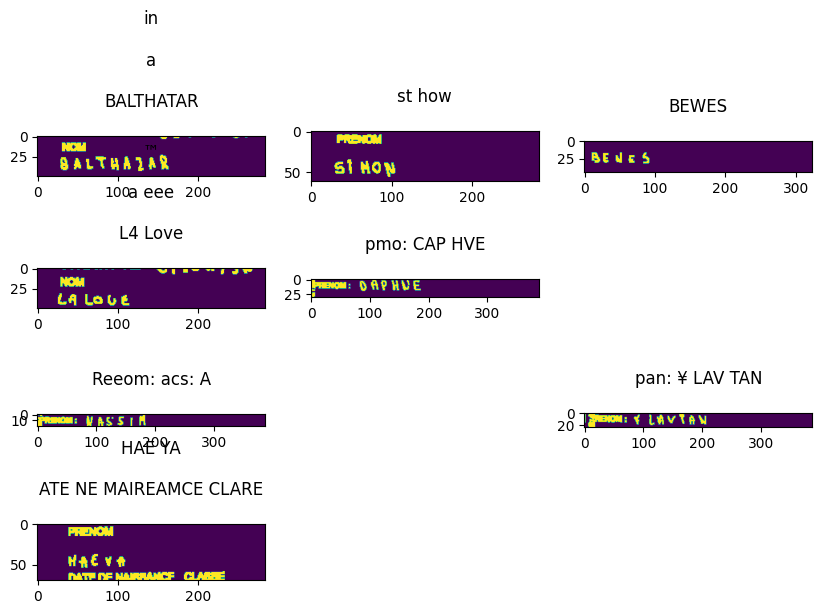

In [223]:
w = 100
h = 100
fig = plt.figure(figsize=(10, 10))
columns = 3
rows = 6
i = 1
words = [1,2,3,4,5,7,9,10]
for i in words:
    file = "handwriting/train_v2/train/TRAIN_"+str(i).zfill(5)+".jpg"
    letters,image = encontrar_letras(file)
    subplot = fig.add_subplot(rows, columns, i)
    subplot.title.set_text(letters)
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #gray = get_grayscale(img)
    #filtro = gaussian_filter(gray)
    #limiar = threshold(gray, limiar=70)
    '''
    erodido = opening(bilateral)'''
    #edged = canny(limiar)
    plt.imshow(image)
    i += 1
plt.show()

In [184]:
def encontrar_letras_ruido(img):
    letras = []
    image = cv2.imread(img)
    blur = denoise(image)
    gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=1)
    text = pytesseract.image_to_string(dilated.copy(), config='--psm 11')
    return text, dilated

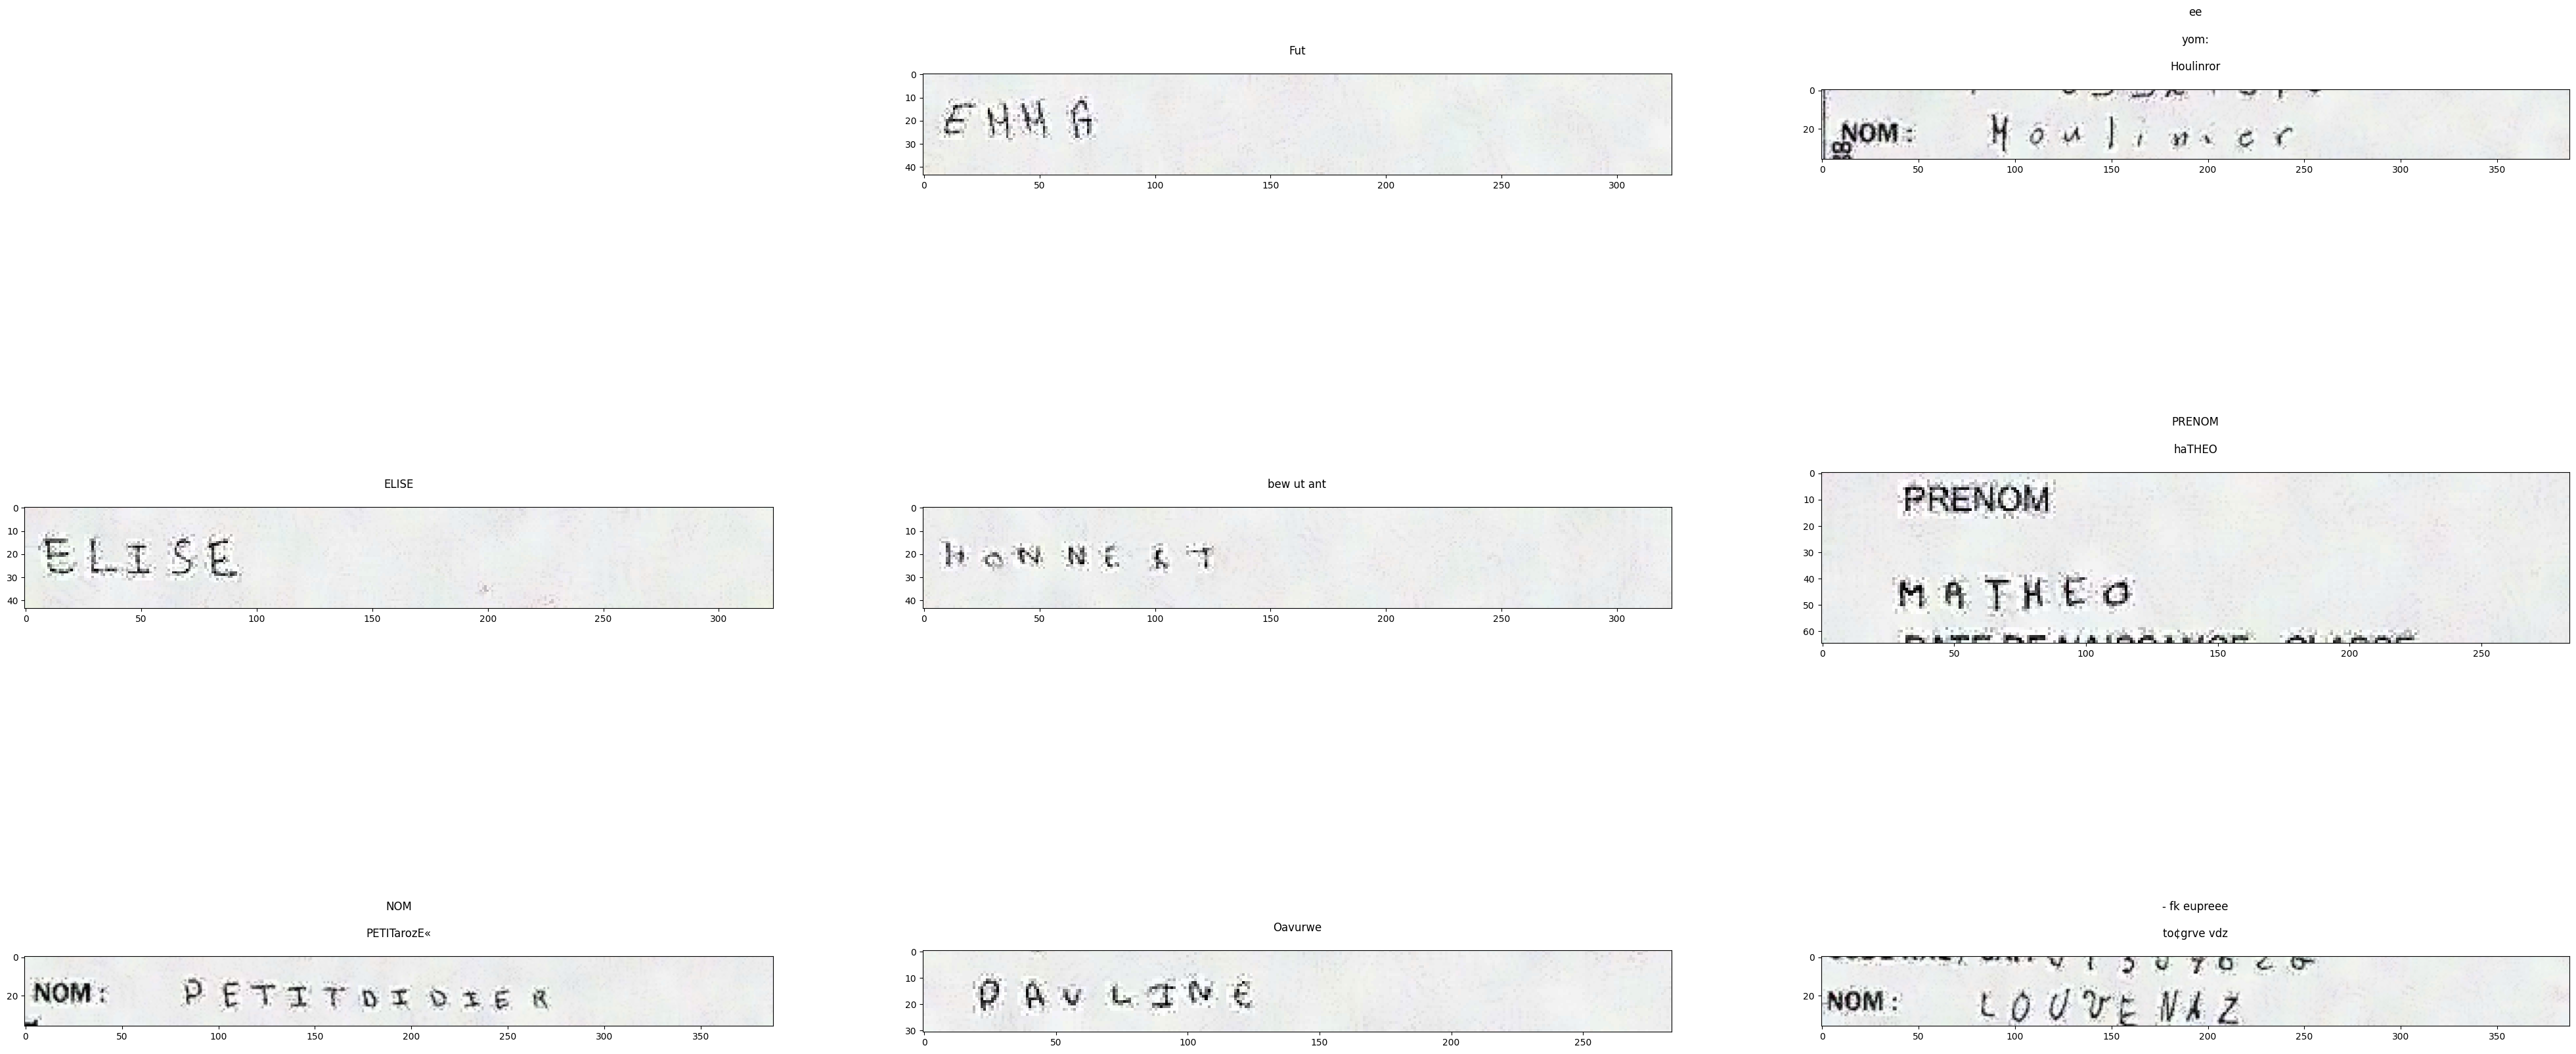

In [179]:
w = 100
h = 100
fig = plt.figure(figsize=(50, 50))
columns = 3
rows = 6
i = 1
for i in range(11, 19):
    file = "imagens_ruido/TRAIN_"+str(i).zfill(5)+".jpg"
    letters,image = encontrar_letras_ruido(file)
    subplot = fig.add_subplot(rows, columns, i)
    subplot.title.set_text(letters)
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #gray = get_grayscale(img)
    #filtro = gaussian_filter(gray)
    #limiar = threshold(gray, limiar=70)
    '''
    erodido = opening(bilateral)'''
    #edged = canny(limiar)
    plt.imshow(image)
    i += 1
plt.show()

In [175]:
def denoise(image):
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 15) 
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #COLOR_BGR2GRAY)
def remove_noise(image, kernel=(6,6)):
    return cv2.blur(image, kernel)
def gaussian_filter(image, kernel=(5,5)):
    return cv2.GaussianBlur(image, kernel, 0)
def adaptive_th(image):
    return cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
def dilate(image, i=2, kernel=(2,2)):
    kernel = np.ones(kernel, np.uint8)
    return cv2.dilate(image, kernel, iterations = i)
def erode(image, it=1, kernel=(2,2)):
    kernel = np.ones(kernel, np.uint8)
    return cv2.erode(image, kernel, iterations = it)
def opening(image):
    kernel = np.ones((2,2), np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
def canny(image):
    return cv2.Canny(image, 100, 200)
def log(image):
    image = cv2.GaussianBlur(image, (3, 3), 0)
    return cv2.Laplacian(image,cv2.CV_16S, ksize=3)
def threshold(image, limiar = 127, tipo=cv2.THRESH_BINARY):
    ret3,th3 = cv2.threshold(image,limiar,255,tipo) #| cv2.THRESH_OTSU)
    return th3
def bilateral_filter(image):
    return cv2.bilateralFilter(image, 13, 15, 15)

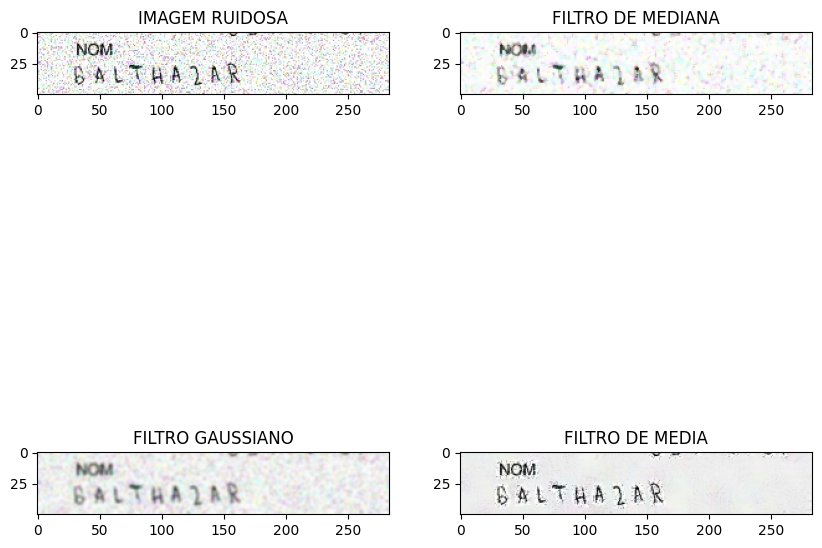

In [196]:
img_ruido = cv2.imread("imagens_ruido/TRAIN_00001.jpg")

fig = plt.figure(figsize=(10,10))
ruido = fig.add_subplot(2, 2, 1)
ruido.title.set_text('IMAGEM RUIDOSA')
plt.imshow(img_ruido)
mediana = fig.add_subplot(2, 2, 2)
mediana.title.set_text('FILTRO DE MEDIANA')
plt.imshow(cv2.medianBlur(img_ruido, 3))
gauss = fig.add_subplot(2, 2, 3)
gauss.title.set_text('FILTRO GAUSSIANO')
plt.imshow(gaussian_filter(img_ruido))
media = fig.add_subplot(2, 2, 4)
media.title.set_text('FILTRO DE MEDIA')
plt.imshow(denoise(img_ruido))

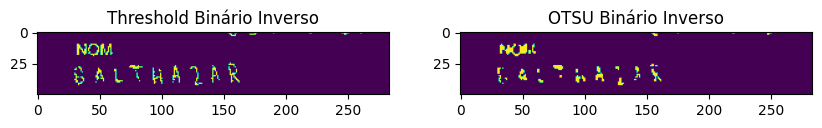

In [218]:
image = cv2.imread("imagens_ruido/TRAIN_00001.jpg")
blur = denoise(image)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
ret1, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
ret2, thresh2 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

fig = plt.figure(figsize=(10,10))
thresh = fig.add_subplot(1, 2, 1)
thresh.title.set_text('Threshold Binário Inverso')
plt.imshow(thresh1)
otsu = fig.add_subplot(1, 2, 2)
otsu.title.set_text('OTSU Binário Inverso')
plt.imshow(cv2.medianBlur(thresh2, 3))

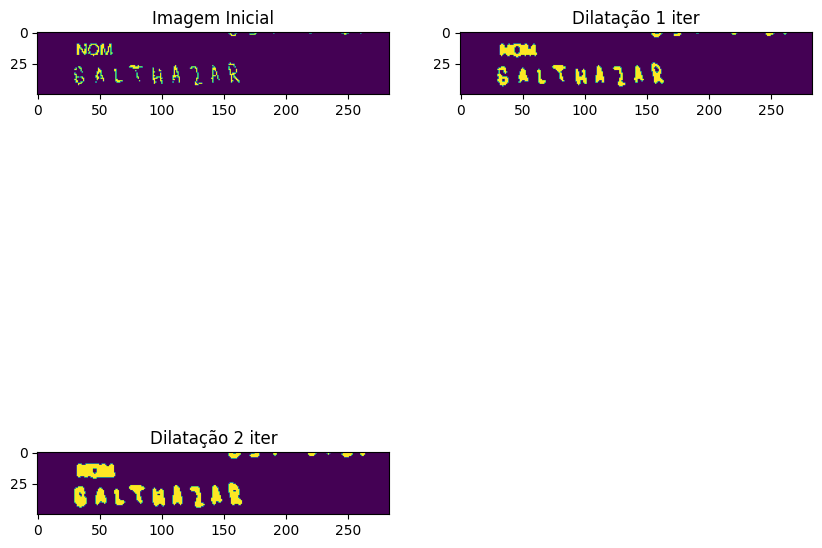

In [219]:
dilatacao1 = dilate(thresh1, i=1)
dilatacao2 = dilate(thresh1)

fig = plt.figure(figsize=(10,10))
thresh = fig.add_subplot(2, 2, 1)
thresh.title.set_text('Imagem Inicial')
plt.imshow(thresh1)
dilatado1 = fig.add_subplot(2, 2, 2)
dilatado1.title.set_text('Dilatação 1 iter')
plt.imshow(cv2.medianBlur(dilatacao1, 3))
dilatado2 = fig.add_subplot(2, 2, 3)
dilatado2.title.set_text('Dilatação 2 iter')
plt.imshow(cv2.medianBlur(dilatacao2, 3))


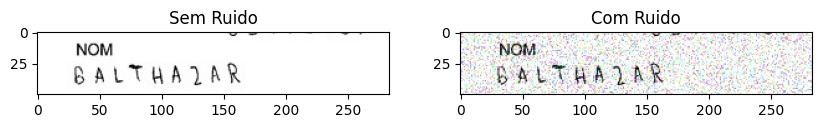

In [222]:
img = cv2.imread("imagens_ruido/TRAIN_00001.jpg")
img_ruido = cv2.imread("handwriting/train_v2/train/TRAIN_00001.jpg")

fig = plt.figure(figsize=(10, 10))
subplot = fig.add_subplot(1, 2, 1)
subplot.title.set_text('Sem Ruido')
plt.imshow(img_ruido)
subplot = fig.add_subplot(1, 2, 2)
subplot.title.set_text('Com Ruido')
plt.imshow(img)
